In [33]:
import string
from random import choice, choices, randint, random

import pandas as pd

In [46]:
def generate_id(letters: int = 2, numbers: int = 3):
    letters = choices(string.ascii_lowercase, k=letters)
    numbers = choices(string.digits, k=numbers)
    return "".join((*letters, *numbers))


def random_series(size: int = 100, dtype: str = "str", n_categories=None, name=None):
    if n_categories is not None:
        if dtype == "str":
            categories = [
                generate_id(letters=5, numbers=0) for _ in range(n_categories)
            ]
        elif dtype == "int":
            categories = [randint(0, 100) for _ in range(n_categories)]
        else:
            categories = [random() for _ in range(n_categories)]
        values = choices(categories, k=size)
    else:
        if dtype == "str":
            values = [generate_id(letters=5) for _ in range(size)]
        elif dtype == "int":
            values = [randint(0, 100) for _ in range(size)]
        else:
            values = [random() for _ in range(size)]
    if name is None:
        name = generate_id(letters=5, numbers=0)
    return pd.Series(data=values, name=name)

In [65]:
def random_table(name: str, foreign_ids: pd.Series = None, size=100):
    index = random_series(size=size, name=name)
    values = [random_series(dtype="float") for _ in range(5)]

    results = pd.concat([index, *values], axis=1)

    if foreign_ids is not None:
        results[foreign_ids.name] = [choice(foreign_ids) for _ in range(size)]
    return results

In [66]:
table1 = random_table(name="table1_id")

In [68]:
table2 = random_table(name="table2_id", foreign_ids=table1.table1_id)

In [70]:
table1.merge(table2, validate="1:m")

,table1_id,ksews,ajbsz,wjxke,xcdyk,jrcuq,table2_id,xxtuc,afknh,uusdk,mtswz,jhach
0,cngyf693,0.006955,0.018416,0.149928,0.026763,0.986926,vrcwy416,0.022418,0.911757,0.665456,0.622177,0.240508
1,rrcke096,0.947613,0.829457,0.463428,0.881844,0.402393,drivz428,0.598574,0.404142,0.644520,0.950349,0.073948
2,rumgz841,0.017839,0.839060,0.100964,0.702883,0.339041,tdggj482,0.041049,0.467975,0.719305,0.653899,0.492713
3,rumgz841,0.017839,0.839060,0.100964,0.702883,0.339041,nodsz890,0.003780,0.286740,0.016134,0.983304,0.467357
4,rumgz841,0.017839,0.839060,0.100964,0.702883,0.339041,rstuo150,0.976850,0.466482,0.805964,0.888575,0.748426
...,...,...,...,...,...,...,...,...,...,...,...,...
95,gswrp118,0.603969,0.483588,0.326159,0.626407,0.041192,nbpww273,0.416883,0.885799,0.605859,0.721079,0.679175
96,dsibx139,0.258752,0.759429,0.793113,0.164078,0.312256,yxqca223,0.108974,0.075490,0.768358,0.831951,0.448042
97,migqz644,0.394686,0.271119,0.803302,0.023020,0.398370,pgvlb227,0.739041,0.295023,0.900893,0.102861,0.366822
98,tzdym134,0.295251,0.733021,0.921499,0.815334,0.007341,ufzzk742,0.822544,0.794965,0.620558,0.727037,0.209196


In [90]:
import networkx as nx

In [92]:
graph = nx.Graph()

graph.add_node("table1", columns=("id1", *[f"col1{n}" for n in range(1, 3)]))
graph.add_node("table2", columns=("id2", *[f"col2{n}" for n in range(1, 4)]))
graph.add_node("table3", columns=("id3", *[f"col3{n}" for n in range(1, 4)]))
graph.add_node("table4", columns=("id4", *[f"col4{n}" for n in range(1, 4)]))

graph.add_edge("table1", "table2", left_on="id1", right_on="id2")
graph.add_edge("table2", "table3", left_on="id2", right_on="id3")
graph.add_edge("table1", "table4", left_on="id1", right_on="id4")

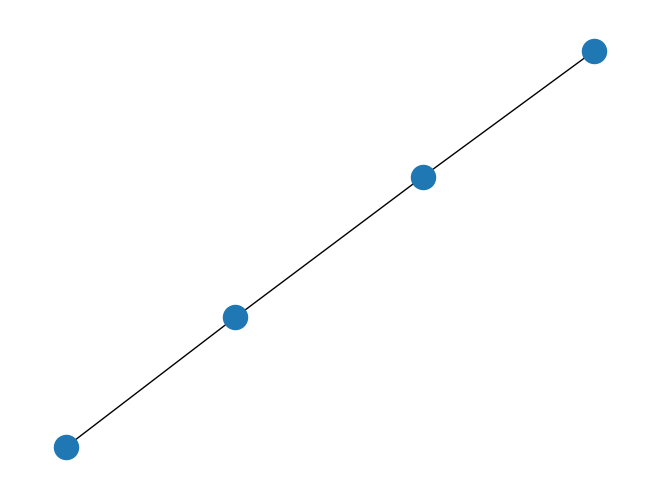

In [94]:
nx.draw(graph)